# Exploratory Data Analysis

Exploring the FastF1 dataset.

In [1]:
# Import the FastF1 library, which provides access to Formula 1 timing data
import fastf1

# Import matplotlib for plotting (bundled with FastF1)
import matplotlib.pyplot as plt

In [2]:
# Enable caching to store downloaded data locally
# This avoids re-downloading the same data on subsequent runs
fastf1.Cache.enable_cache('../data/cache')

## Load Data 

**NOTE**: FastF1 API only has full lap/telemetry data for 2018+ seasons

In [3]:
# Load race session
# Parameters: year (ex: 2023), race name (ex: 'Monaco'), session type (ex: 'R' for Race)

# This downloads telemetry, timing, and lap data from the F1 API
session = fastf1.get_session(2019, 'Hungary', 'R')

# Load the session data into memory
# This fetches all available data for the session (laps, weather, results, etc.)
session.load()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.069000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '5', '16', '55', '10', '7', '77', '4', '23', '11', '

In [4]:
# Access the laps DataFrame from the loaded session
# Each row represents one lap completed by one driver
laps = session.laps

### Data columns

Documentation on meaning of each header can be found at: https://docs.fastf1.dev/api_reference/timing_data.html

In [5]:
# Preview the first 5 rows of the laps DataFrame
# This shows the structure and sample data we'll be working with
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:34:16.691000,HAM,44,0 days 00:01:27.403000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.046000,...,False,Mercedes,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,2.0,False,,False,False
1,0 days 00:35:39.026000,HAM,44,0 days 00:01:22.335000,2.0,1.0,NaT,NaT,0 days 00:00:29.502000,0 days 00:00:29.662000,...,False,Mercedes,0 days 00:34:16.691000,2019-08-04 13:14:16.720,12,2.0,False,,False,True
2,0 days 00:37:00.972000,HAM,44,0 days 00:01:21.946000,3.0,1.0,NaT,NaT,0 days 00:00:29.428000,0 days 00:00:29.407000,...,False,Mercedes,0 days 00:35:39.026000,2019-08-04 13:15:39.055,1,2.0,False,,False,True
3,0 days 00:38:22.618000,HAM,44,0 days 00:01:21.646000,4.0,1.0,NaT,NaT,0 days 00:00:29.418000,0 days 00:00:29.228000,...,False,Mercedes,0 days 00:37:00.972000,2019-08-04 13:17:01.001,1,2.0,False,,False,True
4,0 days 00:39:44.385000,HAM,44,0 days 00:01:21.767000,5.0,1.0,NaT,NaT,0 days 00:00:29.441000,0 days 00:00:29.228000,...,False,Mercedes,0 days 00:38:22.618000,2019-08-04 13:18:22.647,1,2.0,False,,False,True


#### Notes:

**Lap times**:

`LapNumber` starts at 1

`LapStartDate` is the date-timestamp of the start of the lap

`LapStartTime` is Session time at the start of the lap

`Time` is the Session time at the end of the lap.
- Note that since there's a long time between when a session officially starts and drivers completing their first lap, Lap 1 Time can be on the order of 30 minutes.

In [6]:
laps[laps['LapNumber'] == 1].head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:34:16.691000,HAM,44,0 days 00:01:27.403000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.046000,...,False,Mercedes,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,2.0,False,,False,False
70,0 days 00:34:14.892000,VER,33,0 days 00:01:25.604000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.279000,...,False,Red Bull Racing,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,1.0,False,,False,False
140,0 days 00:34:20.369000,VET,5,0 days 00:01:31.081000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:32.028000,...,False,Ferrari,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,5.0,False,,False,False
210,0 days 00:34:18.239000,LEC,16,0 days 00:01:28.951000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.756000,...,False,Ferrari,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,3.0,False,,False,False
280,0 days 00:34:21.254000,SAI,55,0 days 00:01:31.966000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:32.580000,...,False,McLaren,0 days 00:32:49.099000,2019-08-04 13:12:49.128,1,6.0,False,,False,False


`Position` is the driver's ranking/position at the end of the lap.

`LapTime` is the time delta between end of last lap and end of `LapNumber`

**Pit stops**:

`PitInTime` and `PitOutTime`

**Tire degradation**:

`Compound` types of tires: `[SOFT, MEDIUM, HARD, INTERMEDIATE, WET]`

`TyreLife` measures how long the the current tire has been used, measured in laps.

`FreshTyre` is `True` if `TyreLife=0` at stint start.


**Other stuff**

`NaT` stands for "Not a Time" similar to "Not a Number" but for `datetime` and `time` duration data in pandas.

`SpeedI1`, `SpeedI2`, `SpeedFL`, and `SpeedST` are speedtrap measuring speed of the driver in km/h.

`Deleted` indicates if the lap was deleted by stewards due to track violations or other reasons stated in the `DeletedReason` column.

`FastF1Generated` stuff added for things like partial last lap for drivers that retired.

`IsAccurate` is NOT lap time or sector time accuracy (those columns are accurate)

More precisely, `IsAccurate = False` is a warning flag to proceed with caution using the data row.

> Laps need to satisfy the following criteria to be marked as accurate:
> - not an inlap or outlap
> - set under green or yellow flag (the api sometimes has issues with data from SC/VSC laps)
> - is not the first lap after a safety car period (issues with SC/VSC might still appear on the first lap after it has ended)
> -  has a value for lap time and all sector times
> - the sum of the sector times matches the lap time (If this were to ever occur, it would also be logged separately as a data integrity error. You usually don’t need to worry about this.)

## Data Visualizations

### Helper functions

In [7]:
def get_nth_pit_stop_idx(driver_laps, n):
    """
    Returns the index of the n-th pit stop for a driver.
    
    Parameters:
    - driver_laps: DataFrame filtered to one driver's laps
    - n: Which pit stop (1 = first, 2 = second, etc.)
    
    Returns:
    - Index of the n-th pit stop lap, or None if it doesn't exist
    """
    # Get ALL indices where PitInTime is not null
    pit_stop_indices = driver_laps[driver_laps['PitInTime'].notna()].index
    
    # Check if the n-th pit stop exists
    if len(pit_stop_indices) >= n:
        return pit_stop_indices[n - 1]  # n-1 because Python uses 0-indexing
    else:
        return None

### Tire changes

In [8]:
def plot_tire_change(driver_code, pit_stop):
    # Filter laps to only include the specified driver
    driver_laps = laps.pick_drivers(driver_code)

    # Find the first lap where a pit stop occurred
    # PitInTime is present (not NaT) when the driver pitted at the end of that lap
    # .notna() returns True for non-null values, .idxmax() gets the index of first True
    # pit_idx = driver_laps['PitInTime'].notna().idxmax()

    # Get the index of the nth pit stop
    pit_idx = get_nth_pit_stop_idx(driver_laps, pit_stop)

    # Get the lap number of the pit stop (inlap)
    pit_lap = int(driver_laps.loc[pit_idx, 'LapNumber'])

    # Define the window: 5 laps before and 5 laps after the pit stop
    window_start = pit_lap - 5
    window_end = pit_lap + 5

    # Filter laps to only include those within our window
    window_laps = driver_laps[
        (driver_laps['LapNumber'] >= window_start) & 
        (driver_laps['LapNumber'] <= window_end)
    ].copy()

    # Identify inlap and outlap rows within the window
    # Inlap: PitInTime is not NaT (driver entered pits at end of this lap)
    # Outlap: PitOutTime is not NaT (driver exited pits at start of this lap)
    inlap_mask = window_laps['PitInTime'].notna()
    outlap_mask = window_laps['PitOutTime'].notna()

    # Define colors for each tire compound type
    compound_colors = {
        'SOFT': 'red',
        'MEDIUM': 'yellow', 
        'HARD': 'white',
        'INTERMEDIATE': 'green',
        'WET': 'blue'
    }

    # Create a figure and primary axis for the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Set dark background style for better visibility
    fig.patch.set_facecolor('#1e1e1e')
    ax1.set_facecolor('#1e1e1e')

    # Group laps by Stint so we can plot each stint as a separate line segment
    for stint_num, stint_data in window_laps.groupby('Stint'):
        compound = stint_data['Compound'].iloc[0]
        color = compound_colors.get(compound, 'gray')
        
        ax1.plot(
            stint_data['LapNumber'], 
            stint_data['TyreLife'],
            color=color,
            marker='o',
            linewidth=2,
            label=f'Stint {int(stint_num)} ({compound})'
        )

    # Add triangle markers for pit inlap and outlap
    # Downward triangle for inlap (going into pits)
    inlap_data = window_laps[inlap_mask]
    for _, row in inlap_data.iterrows():
        ax1.scatter(
            row['LapNumber'], 
            row['TyreLife'],
            marker='v',  # downward triangle
            s=200,       # size
            color='cyan',
            edgecolors='black',
            linewidths=1.5,
            zorder=5,    # ensure it's drawn on top
        )
    
    # Upward triangle for outlap (coming out of pits)
    outlap_data = window_laps[outlap_mask]
    for _, row in outlap_data.iterrows():
        ax1.scatter(
            row['LapNumber'], 
            row['TyreLife'],
            marker='^',  # upward triangle
            s=200,
            color='lime',
            edgecolors='black',
            linewidths=1.5,
            zorder=5,
        )

    # Configure the primary (bottom) X-axis for LapNumber
    ax1.set_xlabel('Lap Number', color='white')
    ax1.set_ylabel('Tyre Life (laps)', color='white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.set_xticks(range(int(window_laps['LapNumber'].min()), int(window_laps['LapNumber'].max()+1)))
    ax1.set_yticks(range(int(window_laps['TyreLife'].min()), int(window_laps['TyreLife'].max()+1), 2))

    # Create a secondary (top) X-axis for Stint numbers
    ax2 = ax1.twiny()

    stint_positions = []
    stint_labels = []
    for stint_num, stint_data in window_laps.groupby('Stint'):
        mid_lap = stint_data['LapNumber'].mean()
        stint_positions.append(mid_lap)
        stint_labels.append(f'Stint {int(stint_num)}')

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(stint_positions)
    ax2.set_xticklabels(stint_labels)
    ax2.set_xlabel('Stint', color='white')
    ax2.tick_params(axis='x', colors='white')

    # Add title with driver and race info
    ax1.set_title(f'{driver_code} Tyre Life Around Pit Stop (Lap {pit_lap})', 
                  color='white', fontsize=14, pad=20)

    # Build legend manually to avoid duplicates
    handles, labels = ax1.get_legend_handles_labels()
    # Add custom legend entries for pit markers
    from matplotlib.lines import Line2D
    pit_in_marker = Line2D([0], [0], marker='v', color='w', markerfacecolor='cyan', 
                            markersize=10, linestyle='None', markeredgecolor='black', label='Pit In')
    pit_out_marker = Line2D([0], [0], marker='^', color='w', markerfacecolor='lime',
                             markersize=10, linestyle='None', markeredgecolor='black', label='Pit Out')
    handles.extend([pit_in_marker, pit_out_marker])
    ax1.legend(handles=handles, loc='best', facecolor='#333333', labelcolor='white')

    # Add gridlines for easier reading
    ax1.grid(True, alpha=0.3, color='gray')

    plt.tight_layout()
    plt.show()

    return window_laps

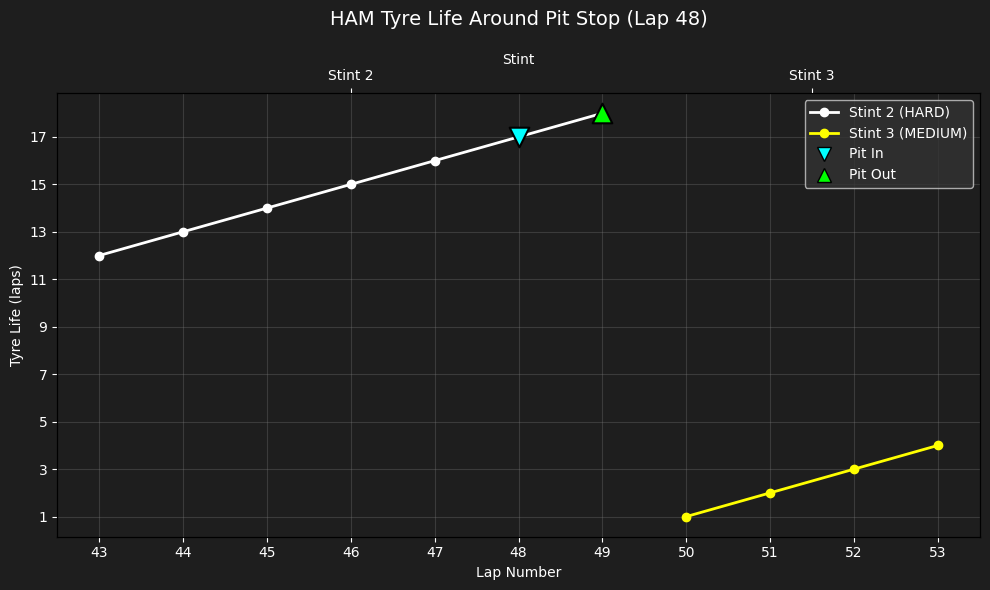

In [9]:
window_laps = plot_tire_change('HAM', 2)

In [10]:
window_laps[['Driver', 'LapNumber', 'Stint', 'TyreLife', 'LapStartTime', 'Time', 'PitInTime', 'PitOutTime']]

,Driver,LapNumber,Stint,TyreLife,LapStartTime,Time,PitInTime,PitOutTime
42,HAM,43.0,2.0,12.0,0 days 01:30:23.365000,0 days 01:31:43.545000,NaT,NaT
43,HAM,44.0,2.0,13.0,0 days 01:31:43.545000,0 days 01:33:03.738000,NaT,NaT
44,HAM,45.0,2.0,14.0,0 days 01:33:03.738000,0 days 01:34:23.918000,NaT,NaT
45,HAM,46.0,2.0,15.0,0 days 01:34:23.918000,0 days 01:35:44.095000,NaT,NaT
46,HAM,47.0,2.0,16.0,0 days 01:35:44.095000,0 days 01:37:04.137000,NaT,NaT
47,HAM,48.0,2.0,17.0,0 days 01:37:04.137000,0 days 01:38:26.589000,0 days 01:38:26.659000,NaT
48,HAM,49.0,2.0,18.0,0 days 01:38:26.589000,0 days 01:40:02.711000,NaT,0 days 01:38:46.426000
49,HAM,50.0,3.0,1.0,0 days 01:40:02.711000,0 days 01:41:22.115000,NaT,NaT
50,HAM,51.0,3.0,2.0,0 days 01:41:22.115000,0 days 01:42:41.314000,NaT,NaT
51,HAM,52.0,3.0,3.0,0 days 01:42:41.314000,0 days 01:44:01.047000,NaT,NaT


**Note:** Sometimes "inconsistencies" may appear:
- `PitInTime` (inlap) may technically occur after the corresponding LapNumber's session `Time` elapsed.
- `TyreLife` will still increment by 1 into the next lap even if `PitOutTime` (outlap) is near the beginning of this next lap, so
- the pre-pit stop tire appears to gain a whole lap of `TyreLife` during the outlap, when it's actually barely used!

This is because FastF1 uses functional labels, not chronological ones:

- Inlap = the lap where driver pits at the end (Lap 48 in Hamilton's case in 2019 Hungary GP)
- Outlap = the lap where driver exit the pits at the beginning (Lap 4 in Hamilton's case in 2019 Hungary GP)